# **Library**

In [ ]:
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# **Data**

In [ ]:
heart_data = pd.read_csv('https://raw.githubusercontent.com/hayya54/dataset/main/heart_disease_health_indicators_BRFSS2015%20(1).csv')
heart_data.head(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
heart_data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
columns = heart_data.columns
columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
heart_data.shape

(253680, 22)

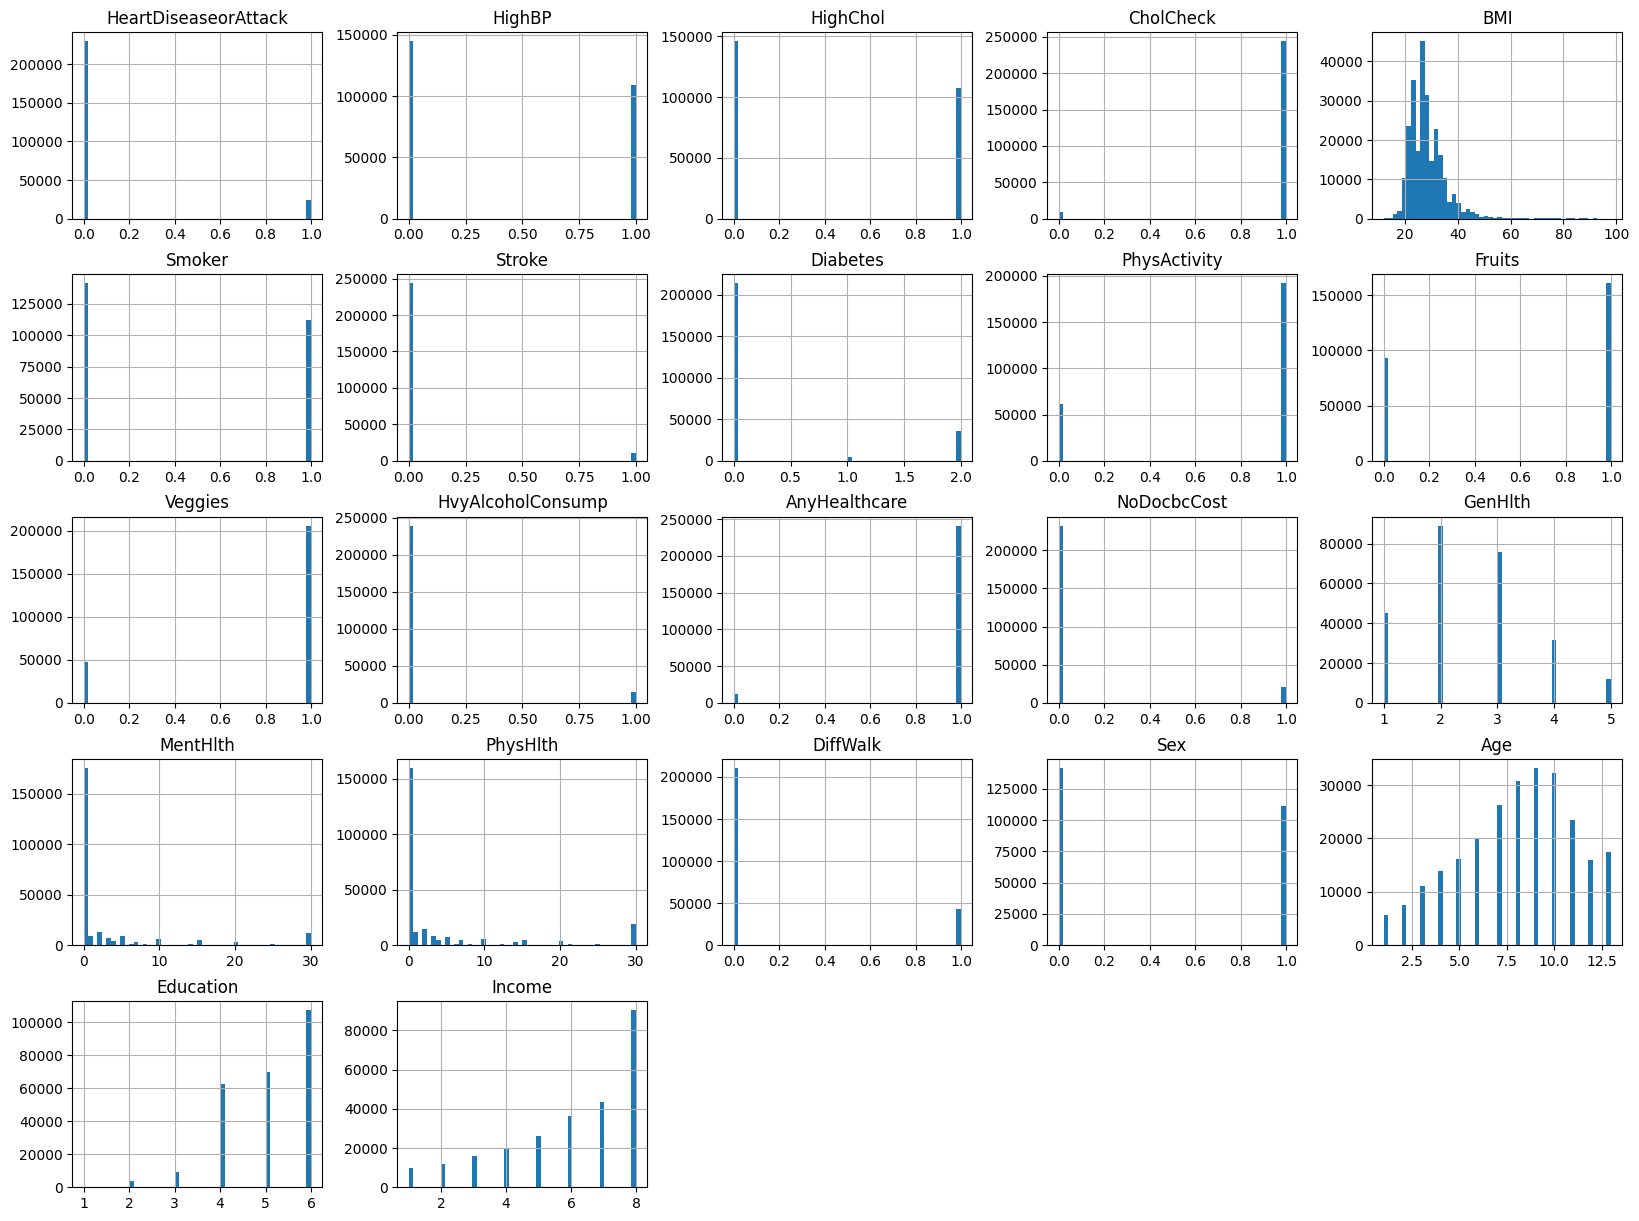

In [ ]:
heart_data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
np.corrcoef(heart_data['HeartDiseaseorAttack'], heart_data['HighBP'])

array([[1.        , 0.20936121],
       [0.20936121, 1.        ]])

In [ ]:
heart_data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
print(heart_data.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of         HeartDiseaseorAttack  HighBP  HighChol  CholCheck    BMI  Smoker  \
0                      False   False     False      False  False   False   
1                      False   False     False      False  False   False   
2                      False   False     False      False  False   False   
3                      False   False     False      False  False   False   
4                      False   False     False      False  False   False   
...                      ...     ...       ...        ...    ...     ...   
253675                 False   False     False      False  False   False   
253676                 False   False     False      False  False   False   
253677                 False   False     False      False  False   False   
253678                 False   False     False      False  False   False   
253679                 False   False     False      False  False   False   

        Stroke  Diabetes 

In [ ]:
heart_data['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

#  **Visualisasi Data**

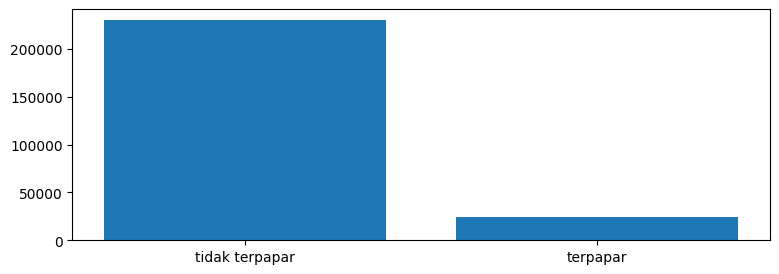

In [ ]:
bar1 = ["tidak terpapar","terpapar"]
bar2 = [229787,23893]
plt.figure(figsize=(9,3))
plt.bar(bar1,bar2)
plt.show()

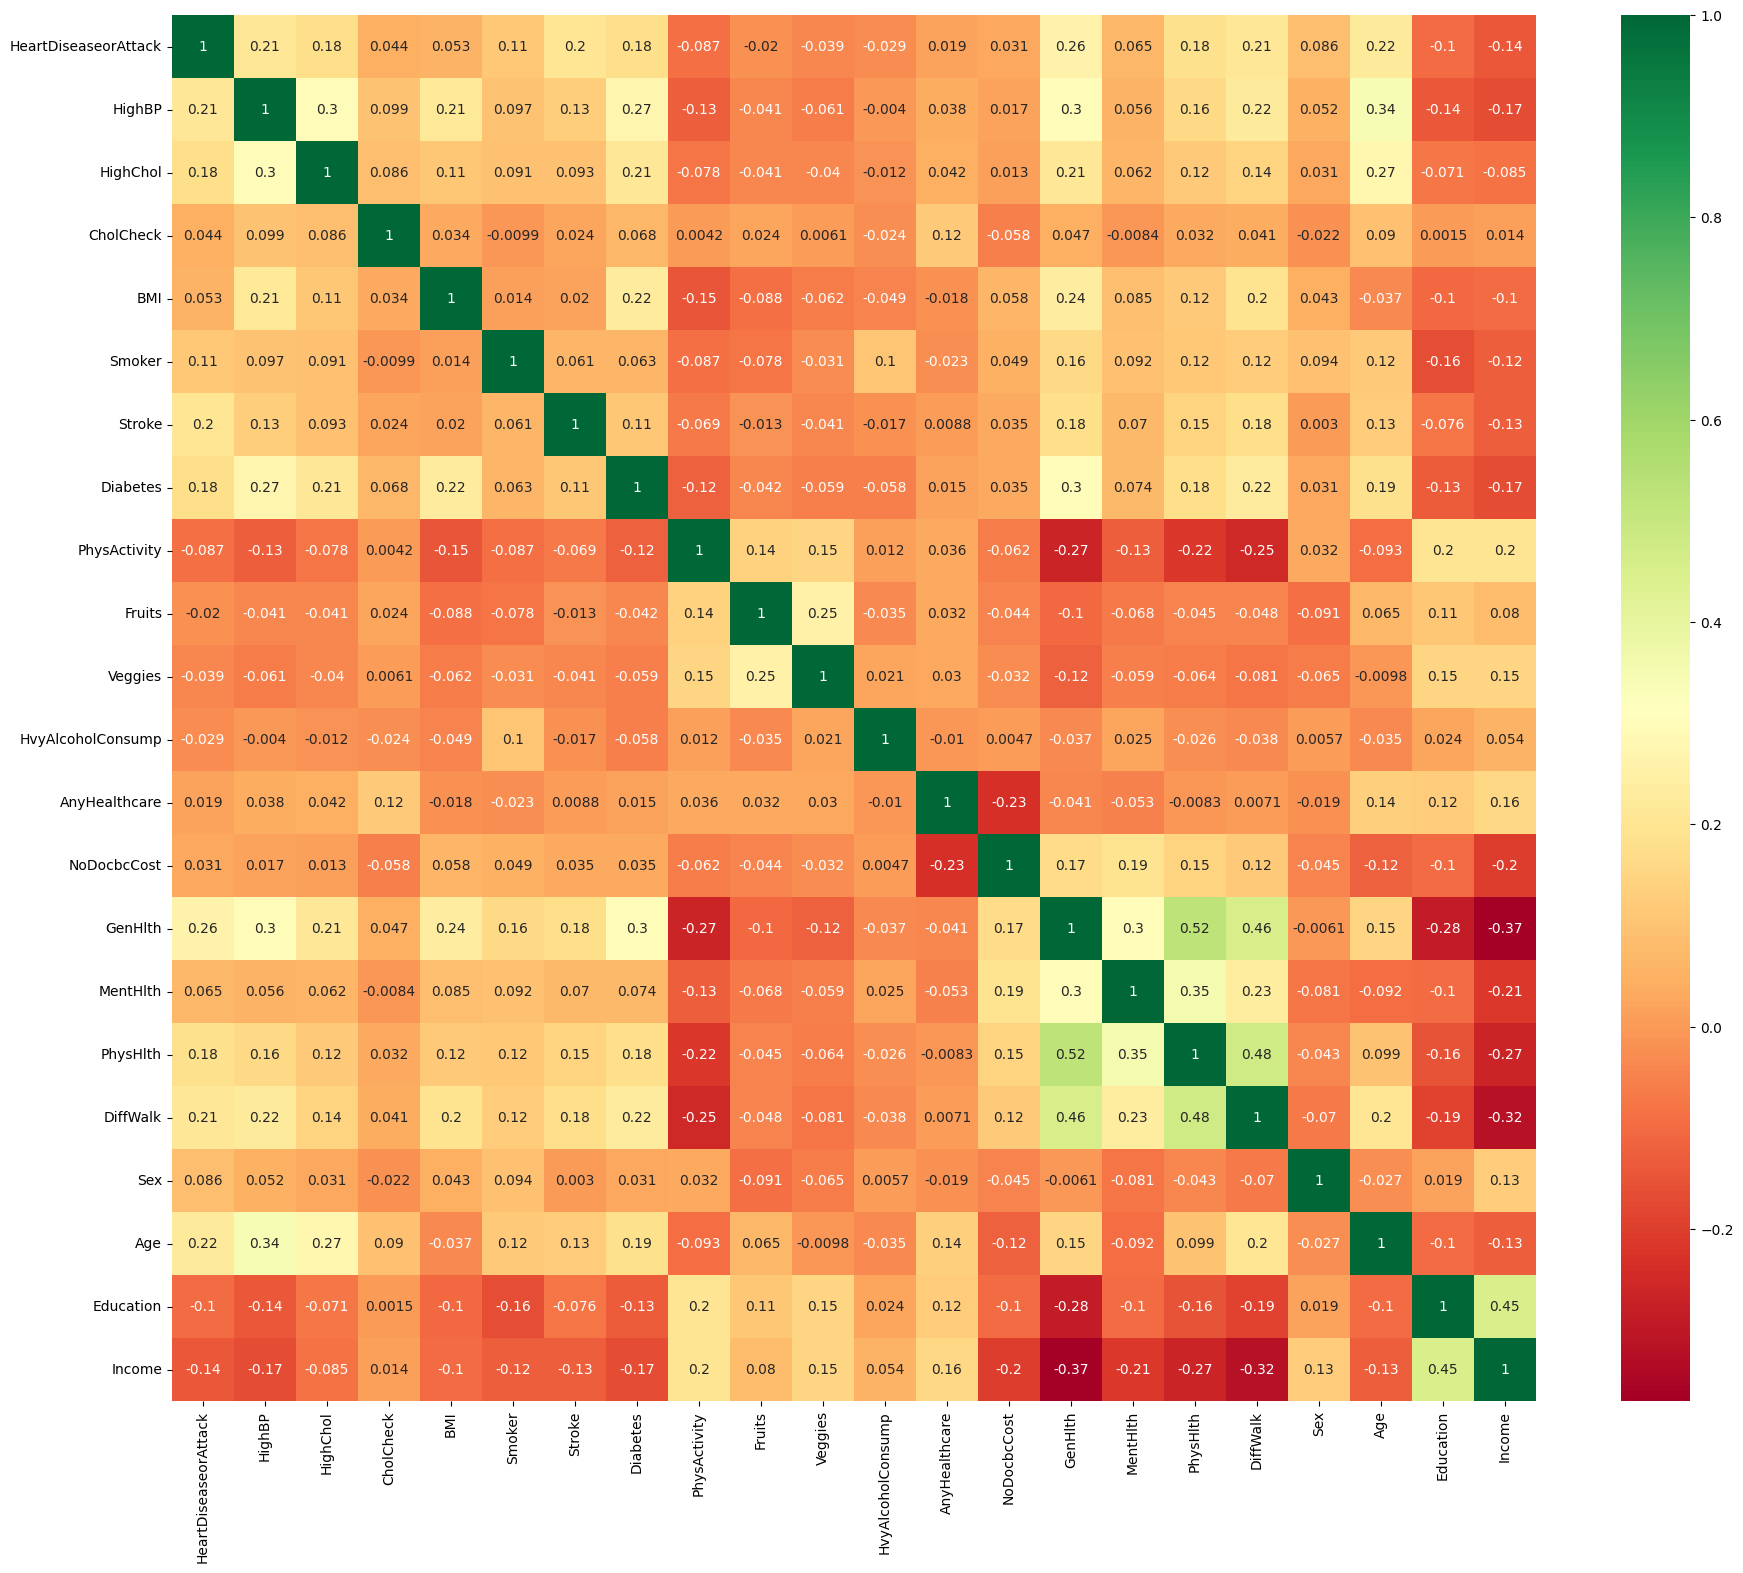

In [ ]:
plt.figure(figsize=(22,18))
p=sns.heatmap(heart_data.corr(),annot=True, cmap = 'RdYlGn')

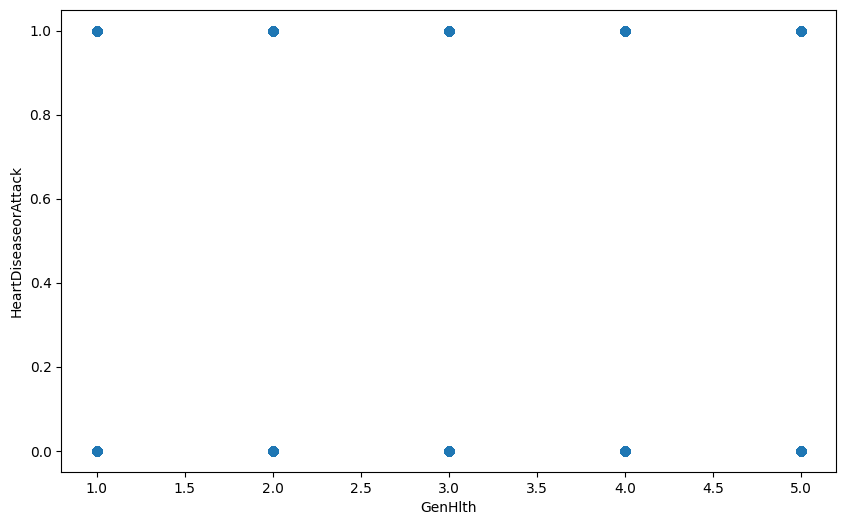

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))
ax.scatter(heart_data['GenHlth'],heart_data['HeartDiseaseorAttack'])
ax.set_xlabel('GenHlth')
ax.set_ylabel('HeartDiseaseorAttack')
plt.show()

# **Linear Regresi**

In [ ]:
X = heart_data.drop('HeartDiseaseorAttack',axis=1)
y = heart_data['HeartDiseaseorAttack']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=44,stratify=y)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import statsmodels.api as sm
independent_vars = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
                    'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
                    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                    'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex',
                    'Age', 'Education', 'Income']

# Membuat matriks X (independen) dan y (dependen)
X = heart_data[independent_vars]
y = heart_data['HeartDiseaseorAttack']

X = sm.add_constant(X)

# Membuat model regresi linear berganda
model = sm.OLS(y, X).fit()

# Mencetak ringkasan hasil regresi linear berganda
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     HeartDiseaseorAttack   R-squared:                       0.149
Model:                              OLS   Adj. R-squared:                  0.149
Method:                   Least Squares   F-statistic:                     2122.
Date:                  Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                          07:46:22   Log-Likelihood:                -27225.
No. Observations:                253680   AIC:                         5.449e+04
Df Residuals:                    253658   BIC:                         5.472e+04
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [ ]:
lr_model = LinearRegression()
# Add a constant to the training data before fitting
X_train_with_const = sm.add_constant(X_train)
lr_model.fit(X_train_with_const, y_train)

# Add a constant column to X_test before prediction
X_test_with_const = sm.add_constant(X_test)

# Predict using the modified X_test
y_pred = lr_model.predict(X_test_with_const)

In [ ]:
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

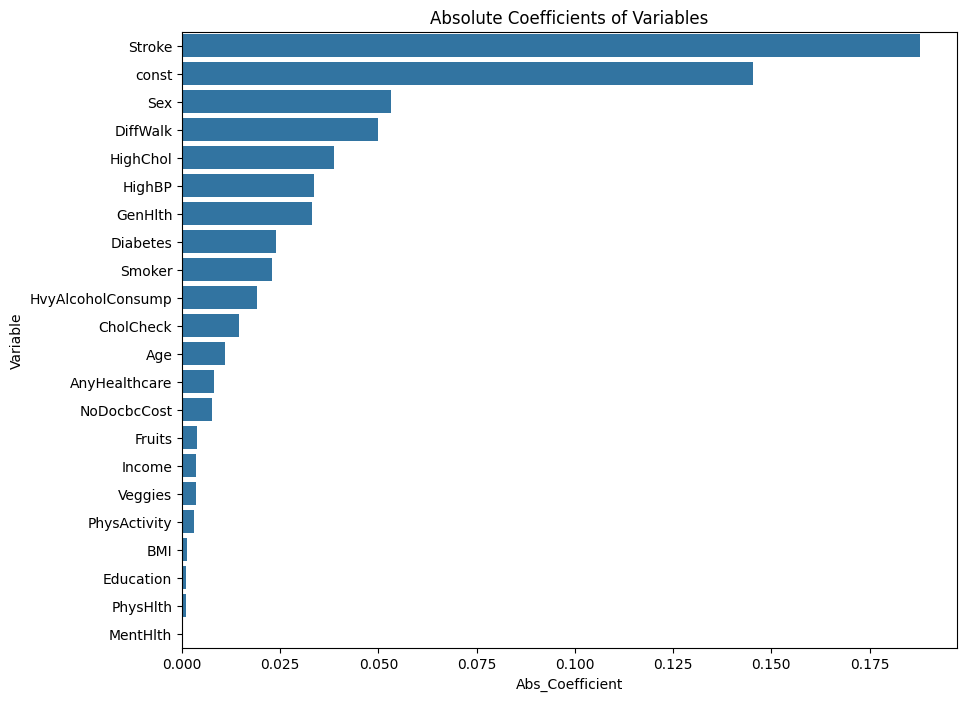

                            Variable  Coefficient        P-Value
Stroke                        Stroke     0.187874   0.000000e+00
const                          const    -0.145407  1.120274e-139
Sex                              Sex     0.053135   0.000000e+00
DiffWalk                    DiffWalk     0.049835  3.394624e-174
HighChol                    HighChol     0.038606  1.374501e-236
HighBP                        HighBP     0.033506  1.244978e-157
GenHlth                      GenHlth     0.032988   0.000000e+00
Diabetes                    Diabetes     0.023933  6.870434e-178
Smoker                        Smoker     0.023006   5.244271e-93
HvyAlcoholConsump  HvyAlcoholConsump    -0.019211   3.112081e-16
CholCheck                  CholCheck     0.014458   4.646380e-07
Age                              Age     0.011045   0.000000e+00
AnyHealthcare          AnyHealthcare     0.008023   2.158284e-03
NoDocbcCost              NoDocbcCost     0.007689   1.902861e-04
Fruits                   

In [ ]:
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.params,
    'P-Value': model.pvalues
})

# Mengurutkan DataFrame berdasarkan nilai absolut dari koefisien
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Plot koefisien
plt.figure(figsize=(10, 8))
# Pass 'coefficients' as the 'data' argument
sns.barplot(x='Abs_Coefficient', y='Variable', data=coefficients)
plt.title('Absolute Coefficients of Variables')
plt.show()

# Filter variabel yang paling berpengaruh berdasarkan p-value < 0.05
influential_vars = coefficients[coefficients['P-Value'] < 0.05]
print(influential_vars[['Variable', 'Coefficient', 'P-Value']])

In [ ]:
coef = model.params[1:]  # Access coefficients starting from the second element (excluding the constant)
intercept = model.params[0]

In [ ]:
print('Train set:', X_train.shape, y_train.shape)
print(X_train[:5])
print('\n')
print('Test set:', X_test.shape, y_test.shape)
print(X_test[:5])

Train set: (202944, 21) (202944,)
        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  \
172350     0.0       1.0        1.0  24.0     0.0     0.0       0.0   
102164     0.0       0.0        1.0  26.0     0.0     0.0       0.0   
136766     0.0       0.0        1.0  31.0     0.0     1.0       0.0   
175473     0.0       0.0        1.0  24.0     1.0     0.0       0.0   
186635     1.0       0.0        1.0  27.0     1.0     0.0       0.0   

        PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  \
172350           1.0     1.0      1.0  ...            1.0          0.0   
102164           1.0     1.0      1.0  ...            1.0          0.0   
136766           1.0     1.0      1.0  ...            1.0          0.0   
175473           0.0     1.0      1.0  ...            1.0          0.0   
186635           0.0     1.0      1.0  ...            1.0          0.0   

        GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
172350      1.0 

# **Evaluasi**

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R-squared:', r2)

RMSE: 0.26914919939975956
R-squared: 0.15095651742956195


In [ ]:
from sklearn.model_selection import train_test_split
# Remove the reshape, X is already in the correct format
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=44,stratify=y)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean Absolute Error (MAE): %.2f%%' % (mean_absolute_error(y_pred,y_test) * 100))
print('Mean squared Error (MSE): %.2f%%' % (mean_squared_error(y_pred,y_test) * 100))

Mean Absolute Error (MAE): 9.22%
Mean squared Error (MSE): 9.22%


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Assuming y_pred from the previous code block contains the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45957
         1.0       0.55      0.12      0.20      4779

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.57     50736
weighted avg       0.88      0.91      0.88     50736

[[45480   477]
 [ 4201   578]]


In [ ]:
cm = accuracy_score(y_test, y_pred)
cm

0.907797224850205

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# The list newx should have 22 features to match the original data
newx = [[1,1,1,25,0,0,1,0,1,0,1,1,0,3,20,15,0,1,10,3,5, 0]]  # Added a 0 at the end
newx_scaled = sc.transform(newx)

hasil = model.predict(newx_scaled)
print(hasil)

[0.]
